# Cross-Validated Linear Regression Model for Predicting Vehicle Curb Weight

# 1 Introduction

We aim to build a cross-validated linear regression model using data from the UC Irvine machine learning archive to predict the curb weight of passenger vehicles. With 205 observations and 26 attributes in the dataset, we'll focus on key variables: height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg.

The curb weight, representing a vehicle's weight without occupants or baggage, is crucial for understanding its fuel efficiency, performance, and safety. Our selected explanatory variables capture various physical and performance attributes that could influence curb weight.

Through linear regression analysis and cross-validation techniques, we'll explore the relationship between these variables and curb weight. This assignment offers a practical application of cross-validation principles in linear regression modeling, aiming to develop a reliable predictive model for estimating curb weight based on observable vehicle characteristics.

# 2 Exploratory Data Analysis 

## 2.1 Data loading

Read the data set from Github repository and load it into a Pandas dataframe. And also add columns names to better understanding the dataset.

In [1]:
# Import pandas package
import pandas as pd

# Replace the URL with the direct link to the raw csv file
url = "https://raw.githubusercontent.com/Rainie34/DAV-6150/main/M2_Data.csv"

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv(url)

# add columns names
column_names = ["symboling","normalized-losses","make", "fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
                "engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size",
                "fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = column_names

# Print the table
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


Since we are focusing on the relationship between the curb weight of passenger vehicles and the variables height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg, we create a new dataframe containing only these variables to make it easier for us to view the data.


In [2]:
# Use the loc attribute to select the specified column
new_df = df.loc[:, ["curb-weight", "height", "width","length","wheel-base","engine-size","horsepower","peak-rpm","city-mpg"]]

# Print new DataFrame
new_df.head()

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,2548,48.8,64.1,168.8,88.6,130,111,5000,21
1,2823,52.4,65.5,171.2,94.5,152,154,5000,19
2,2337,54.3,66.2,176.6,99.8,109,102,5500,24
3,2824,54.3,66.4,176.6,99.4,136,115,5500,18
4,2507,53.1,66.3,177.3,99.8,136,110,5500,19


## 2.2 Univariate EDA

### 2.2.1 Curb-weight

In [3]:
# Describe the column
new_df["curb-weight"].describe()

count     204.000000
mean     2555.602941
std       521.960820
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2939.250000
max      4066.000000
Name: curb-weight, dtype: float64

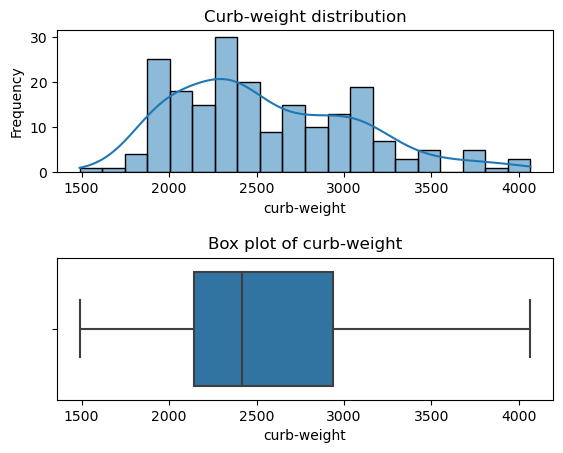

In [4]:
# Import the necessary packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Curb-weight distribution")
sns.histplot(data=new_df, x="curb-weight", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of curb-weight")
sns.boxplot(data=new_df, x="curb-weight");

The distribution of Curb-weight is as follows: the mean is 2555.60 lbs, the standard deviation is 521.96 lbs, the minimum value is 1488 lbs, and the maximum value is 4066 lbs. The histogram shows a shape similar to a normal distribution, clustered between 2,000 and 3,000 pounds. The box plot shows a median of about 2414 lbs, a 25% quartile of about 2145 lbs, and a 75% quartile of about 2939.25 lbs, with most of the data points clustered inside the box, but with a few large outliers. 

### 2.2.2 Height

In [5]:
# Describe the column
new_df["height"].describe()

count    204.000000
mean      53.749020
std        2.424901
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

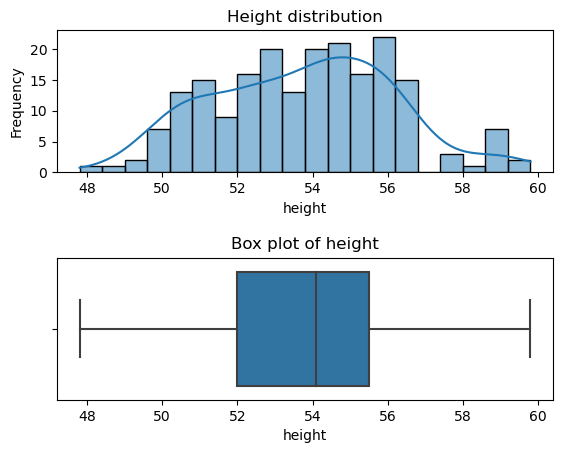

In [6]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Height distribution")
sns.histplot(data=new_df, x="height", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of height")
sns.boxplot(data=new_df, x="height");

The data shows that the mean value of height is about 53.75 inches, the standard deviation is about 2.42 inches, the minimum value is 47.80 inches and the maximum value is 59.80 inches. By analyzing the graph, we can see that height has a roughly normal or slightly skewed shape. The box plot shows that the median height is approximately 54.10 inches, the 25th percentile is approximately 52.00 inches, and the 75th percentile is approximately 55.50 inches, with most of the data points clustered within the boxes, indicating a relatively stable concentration trend. However, there are some outliers.

### 2.2.3 Width

In [7]:
# Describe the column
new_df["width"].describe()

count    204.000000
mean      65.916667
std        2.146716
min       60.300000
25%       64.075000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

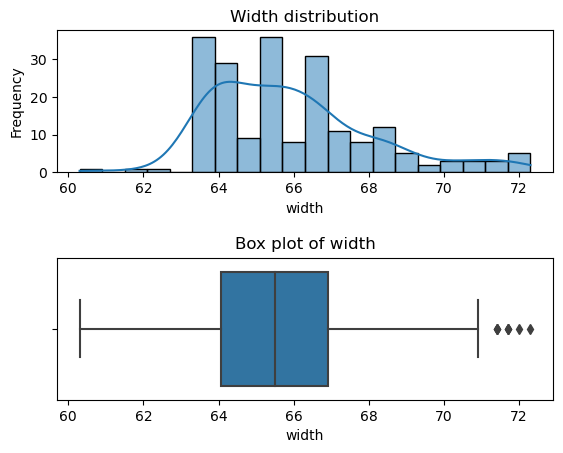

In [8]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Width distribution")
sns.histplot(data=new_df, x="width", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of width")
sns.boxplot(data=new_df, x="width");

According to the data, the distribution of width is as follows: the average width is 65.92 inches with a standard deviation of 2.15 inches. The minimum value of width is 60.3 inches and the maximum value is 72.3 inches. Based on the box plot and histogram, width exhibits a distribution concentrated around the median, with the box plot showing a median of approximately 65.5 inches, a 25% quartile of approximately 64.08 inches, and a 75% quartile of approximately 66.9 inches. Most of the data points are concentrated within the box and the concentration trend is relatively stable, but there are some large outliers. 

### 2.2.4 Length

In [9]:
# Describe the column
new_df["length"].describe()

count    204.000000
mean     174.075000
std       12.362123
min      141.100000
25%      166.300000
50%      173.200000
75%      183.200000
max      208.100000
Name: length, dtype: float64

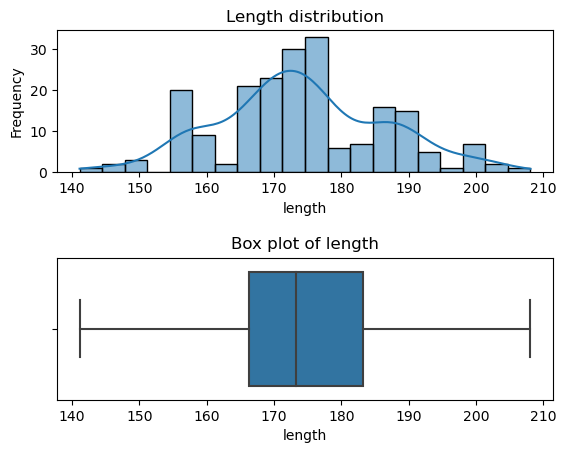

In [10]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Length distribution")
sns.histplot(data=new_df, x="length", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of length")
sns.boxplot(data=new_df, x="length");

According to the data, the mean value of length is 174.075, the standard deviation is 12.362, the minimum value is 141.1, and the maximum value is 208.1. From the graph, the distribution of length roughly exhibits a single-peak pattern, which is concentrated within a certain range. The box plot shows that the median of length is about 173.2, the 25% quantile is about 166.3, and the 75% quantile is about 183.2. Most of the data points are covered inside the box, but there may be some large outliers. 

### 2.2.5 Wheel base

In [11]:
# Describe the column
new_df["wheel-base"].describe()

count    204.000000
mean      98.806373
std        5.994144
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

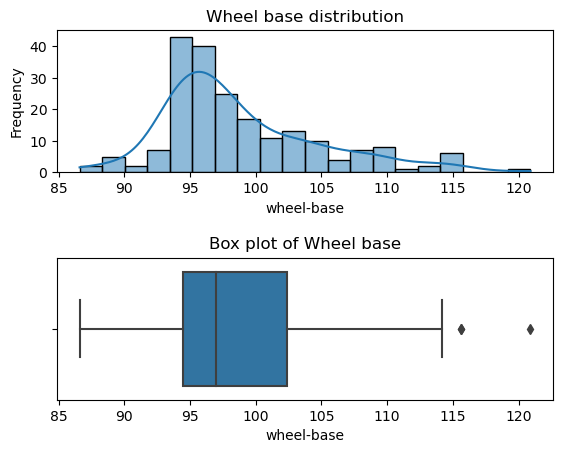

In [12]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Wheel base distribution")
sns.histplot(data=new_df, x="wheel-base", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of Wheel base")
sns.boxplot(data=new_df, x="wheel-base");

According to the data, the mean value of wheel base is about 98.81, the standard deviation is about 5.99, the minimum value is 86.60, and the maximum value is 120.90. The histogram shows that the distribution of wheel base shows a roughly normal shape, which is mainly concentrated in the range of 90 to 100. The box plot shows that the median is about 97, the 25% quantile is about 94.5, and the 75% quantile is about 102.4. Most of the data points are concentrated inside the box, showing a relatively stable concentration trend. However, there are some large outliers.

### 2.2.6 Engine size

In [13]:
# Describe the column
new_df["engine-size"].describe()

count    204.000000
mean     126.892157
std       41.744569
min       61.000000
25%       97.000000
50%      119.500000
75%      142.000000
max      326.000000
Name: engine-size, dtype: float64

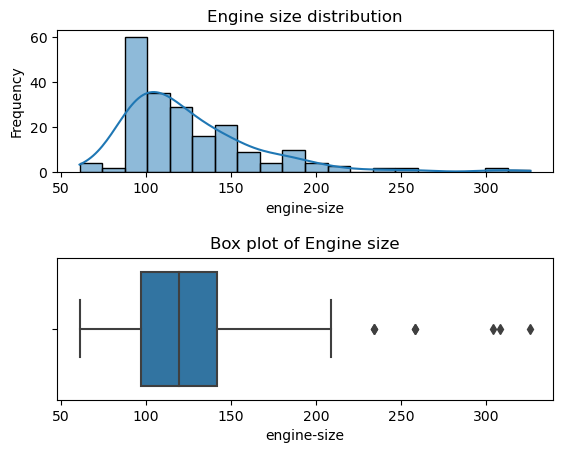

In [14]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Engine size distribution")
sns.histplot(data=new_df, x="engine-size", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of Engine size")
sns.boxplot(data=new_df, x="engine-size");

According to the data, the distribution of engine size is as follows: the mean is 126.89, the standard deviation is 41.74, the minimum value is 61, and the maximum value is 326. The histogram shows that the distribution of engine size is right skewed, mainly concentrated between 100 and 150. The box plot shows a median of about 119.5, a 25% quantile of about 97, and a 75% quantile of about 142, with the data points mainly concentrated inside the box. However, there are some large outliers with a maximum value of 326.

### 2.2.7 Horsepower

In [15]:
# Describe the column
new_df["horsepower"].describe()

count     204
unique     60
top        68
freq       19
Name: horsepower, dtype: object

In [16]:
new_df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

As we can see, this variable was treated as an object when it should be a numeric value. This is due to the presence of '?' in the values of the column. Therefore, we will remove the row that contains this value and transform this variable into a float.

### 2.2.8 Peak RPM

In [17]:
# Describe the column
new_df["peak-rpm"].describe()

count      204
unique      24
top       5500
freq        37
Name: peak-rpm, dtype: object

In [18]:
new_df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

As we can see, this variable was treated as an object when it should be a numeric value. This is due to the presence of '?' in the values of the column. Therefore, we will remove the row that contains this value and transform this variable into a float.

### 2.2.9 City MPG

In [19]:
# Describe the column
new_df["city-mpg"].describe()

count    204.000000
mean      25.240196
std        6.551513
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

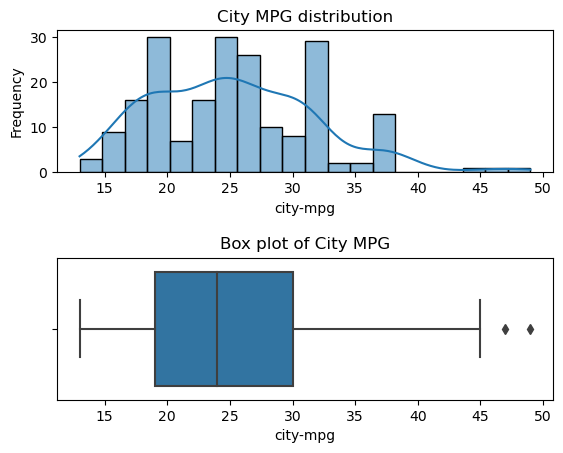

In [20]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("City MPG distribution")
sns.histplot(data=new_df, x="city-mpg", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of City MPG")
sns.boxplot(data=new_df, x="city-mpg");

According to the data, the distribution of city MPG is as follows: the sample size is 204, the mean is 25.24, the standard deviation is 6.55, the minimum value is 13, and the maximum value is 49. Based on the analysis of histogram and box plot, city MPG shows a right-skewed distribution pattern, with most of the data points clustered around the higher mpg values, but there are also some lower mpg values. The box plot shows a median of about 24, a 25% quartile of about 19, and a 75% quartile of about 30, with most of the data points clustered around the inside of the box, but some higher outliers are also present.

## 2.3 Data preparation and prepped data review

### 2.3.1 Horsepower

In [21]:
# Remove rows with '?' in the 'horsepower' column
new_df = new_df[new_df['horsepower'] != '?']

# Convert 'horsepower' column to float
new_df['horsepower'] = new_df['horsepower'].astype(float)

# Describe the column
new_df["horsepower"].describe()

count    202.000000
mean     104.222772
std       39.810182
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

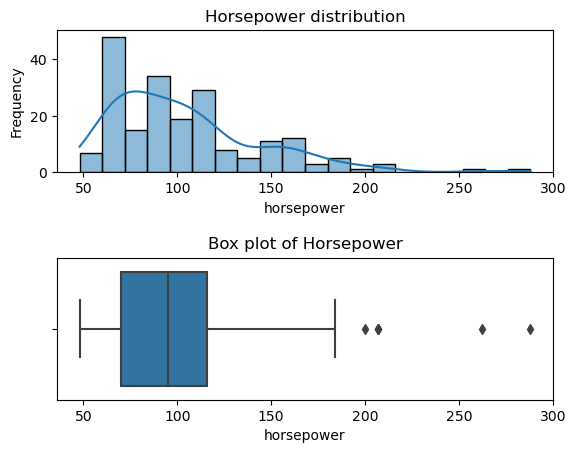

In [22]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Horsepower distribution")
sns.histplot(data=new_df, x="horsepower", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of Horsepower")
sns.boxplot(data=new_df, x="horsepower");

On average, the vehicles have a horsepower of 104.22, with a variation (standard deviation) of 39.81. The range of horsepower spans from a minimum of 48 to a maximum of 288, while the 25th, 50th (median), and 75th percentiles are 70, 95, and 116, respectively.

### 2.3.2 Peak RPM

In [23]:
# Remove rows with '?' in the 'horsepower' column
new_df = new_df[new_df['peak-rpm'] != '?']

# Convert 'horsepower' column to float
new_df['peak-rpm'] = new_df['peak-rpm'].astype(float)

# Describe the column
new_df["peak-rpm"].describe()

count     202.000000
mean     5125.990099
std       480.443680
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

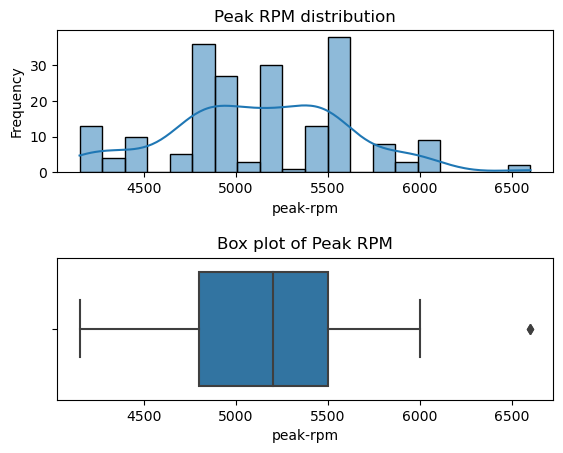

In [24]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211)
plt.title("Peak RPM distribution")
sns.histplot(data=new_df, x="peak-rpm", bins=20, kde=True)
plt.ylabel("Frequency")

### Second plot - Box plot ###
plt.subplot(212)
plt.title("Box plot of Peak RPM")
sns.boxplot(data=new_df, x="peak-rpm");

On average, the engines have a peak RPM of 5125.99, with a standard deviation of 480.44. The range of peak RPM values extends from a minimum of 4150 to a maximum of 6600. The 25th, 50th (median), and 75th percentiles are 4800, 5200, and 5500, respectively,

## 2.4 Bivariate EDA

### 2.4.1 Curb weight vs Height

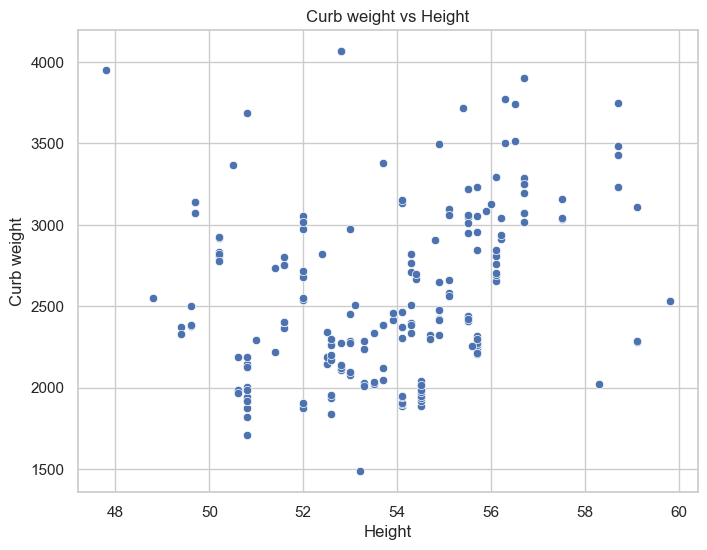

In [25]:
# Setting the graphic style
sns.set(style="whitegrid")

# Creating Scatterplots
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x="height", y="curb-weight")
plt.title("Curb weight vs Height")
plt.xlabel("Height")
plt.ylabel("Curb weight")
plt.show()

As can be seen from the graph, the range of curb weight is from 1500 to 4000, and the range of height is from 48 to 60. The distribution of curb weight is relatively uniform, while the distribution of height has some outliers, such as the points with a height of 48 and those with a height of 60. The correlation between these two variables is weak, with scattered data points and no apparent linear relationship.

### 2.4.2 Curb weight vs Width

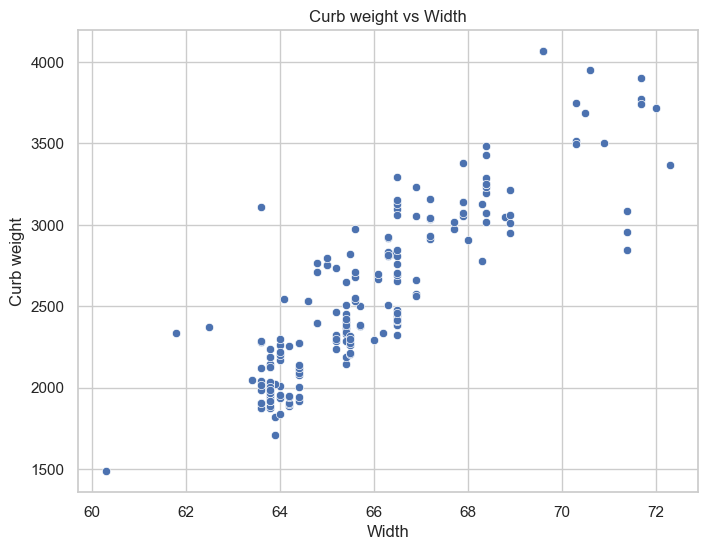

In [26]:
# Setting the graphic style
sns.set(style="whitegrid")

# Creating Scatterplots
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x="width", y="curb-weight")
plt.title("Curb weight vs Width")
plt.xlabel("Width")
plt.ylabel("Curb weight")
plt.show()

As can be seen from the figure, the range of width is from 60 to 72, and the range of curb weight is from 1500 to 4000. The data points show a certain linear trend, but there are also some outliers, such as points with width 60 and points with width 72. The correlation between these two variables is positive, as width increases, curb weight also tends to increase.

### 2.4.3 Curb weight vs Length

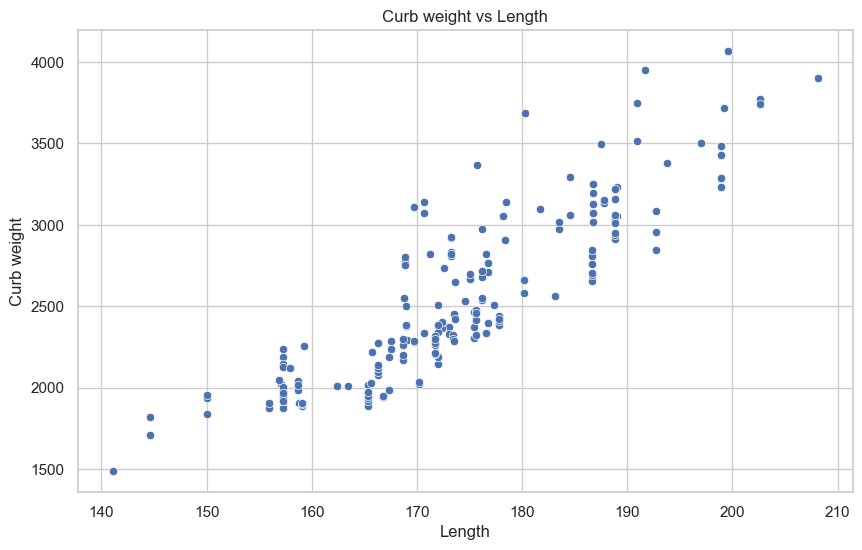

In [27]:
# Setting the graphic style
sns.set(style="whitegrid")

# Creating Scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x="length", y="curb-weight")
plt.title("Curb weight vs Length")
plt.xlabel("Length")
plt.ylabel("Curb weight")
plt.show()

As can be seen from the graph, length ranges from 140 to 210 and curb weight ranges from 1500 to 4000. The data points show a somewhat linear trend, but there are some outliers, such as the points with a length of 140 and the points with a length of 210. The correlation between these two variables is positive, and curb weight tends to increase as length increases.

### 2.4.4 Curb weight vs Wheel base

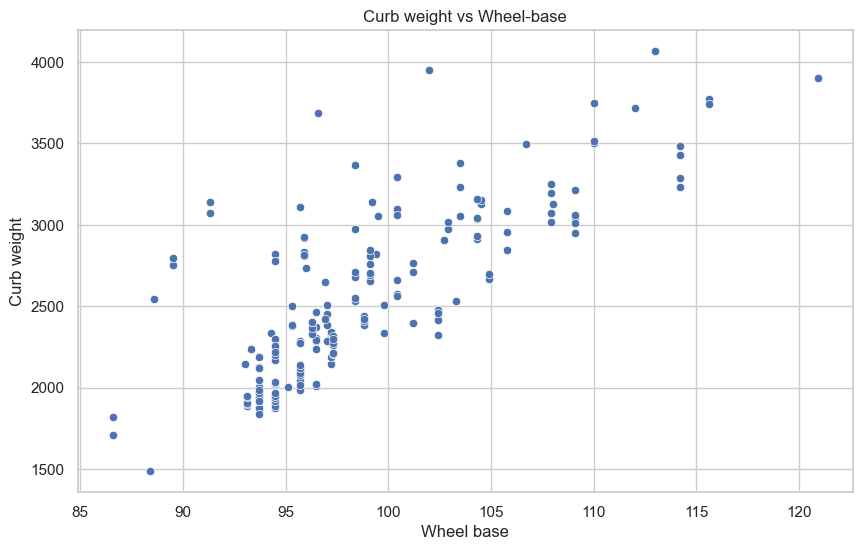

In [28]:
# Setting the graphic style
plt.figure(figsize=(10, 6))

# Creating Scatterplots
sns.scatterplot(data=new_df, x="wheel-base", y="curb-weight")
plt.title("Curb weight vs Wheel-base")
plt.xlabel("Wheel base")
plt.ylabel("Curb weight")

plt.show()

As can be seen from the graph, wheel base ranges from 85 to 120, and curb weight ranges from 1500 to 4000. The data points show some linear trends, but there are some outliers, such as the points with an axle-space of 85 and the points with an axle-space of 120. The correlation between these two variables is positive, and as wheel base increases, curb weight also tends to increase.

### 2.4.5 Curb weight vs Engine size

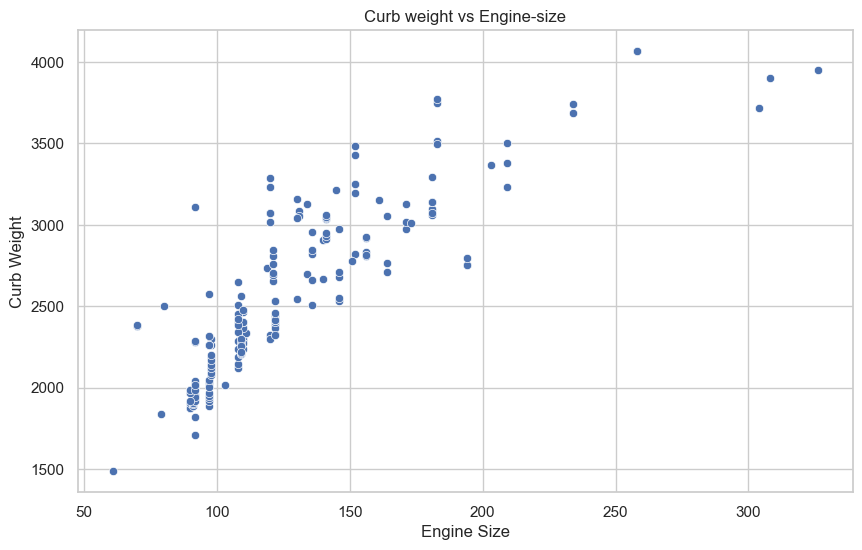

In [29]:
# Setting the graphic style
plt.figure(figsize=(10, 6))

# Creating Scatterplots
sns.scatterplot(data=new_df, x="engine-size", y="curb-weight")
plt.title("Curb weight vs Engine-size")
plt.xlabel("Engine Size")
plt.ylabel("Curb Weight")
plt.show()

As seen in the graph, engine size ranges from 50 to 300 and curb weight ranges from 1500 to 4000. The data points show a somewhat linear trend, but there are some outliers, such as points with an engine size of 50 and points with an engine size of 300. The correlation between these two variables is positive, as engine size increases, curb weight also tends to increase.


### 2.4.6 Curb weight vs Horsepower

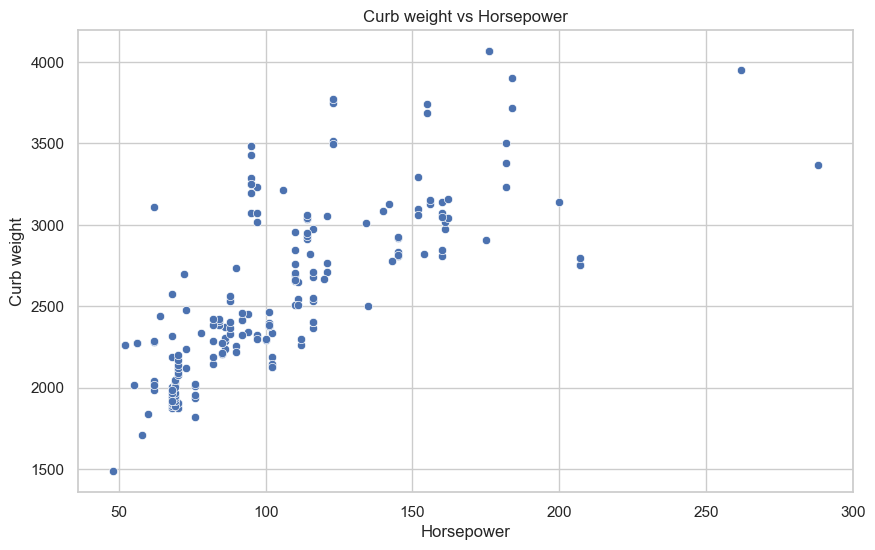

In [30]:
# Setting the graphic style
plt.figure(figsize=(10, 6)) 
# Creating Scatterplots
sns.scatterplot(data=new_df, x="horsepower", y="curb-weight")
plt.title("Curb weight vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Curb weight")
plt.show()

As depicted in the plot above, a discernible positive correlation is evident between the curb weight and horsepower. This implies that, as the curb weight of the vehicles increases, there is a corresponding increase in their horsepower. The visual representation underscores the relationship between these two variables, highlighting a noticeable trend in the dataset.

### 2.4.7 Curb weight vs Peak RPM

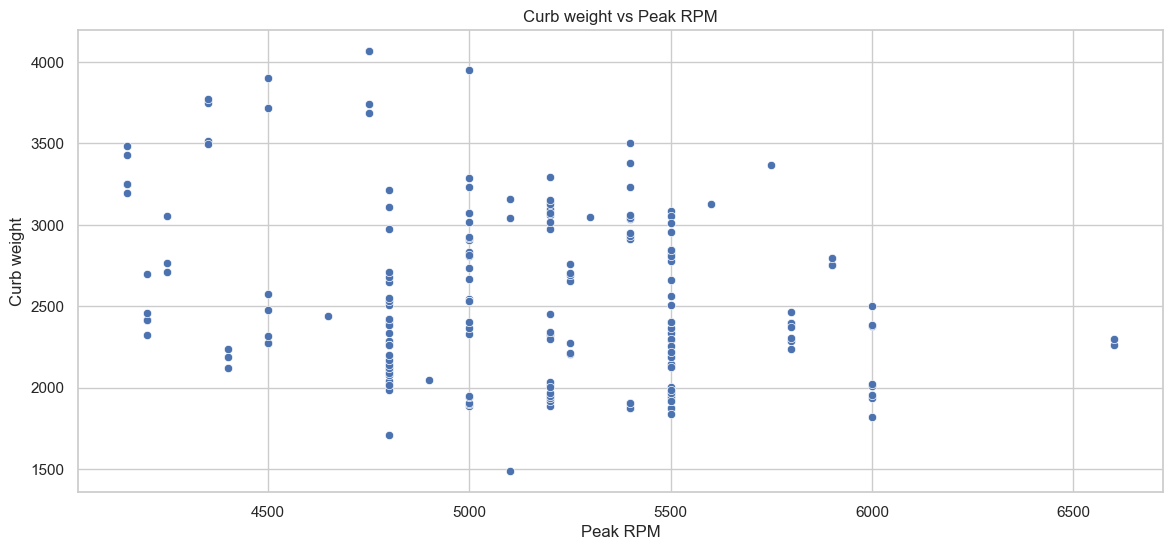

In [31]:
# Setting the graphic style
sns.set(style="whitegrid")

# Creating Scatterplots
plt.figure(figsize=(14, 6))
sns.scatterplot(data=new_df, x="peak-rpm", y="curb-weight")
plt.title("Curb weight vs Peak RPM")
plt.xlabel("Peak RPM")
plt.ylabel("Curb weight")
plt.show()

When examining the relationship between curb weight and peak RPM through the analysis of a scatter plot, it becomes evident that there is no discernible correlation between these two variables. Despite a thorough visual inspection of the data points, there is no clear trend or pattern that indicates a direct connection between curb weight and peak RPM. This lack of a noticeable relationship suggests that changes in curb weight do not correspond to consistent changes in peak RPM, as illustrated by the dispersed nature of points in the scatter plot.

### 2.4.8 Curb weight vs City MPG

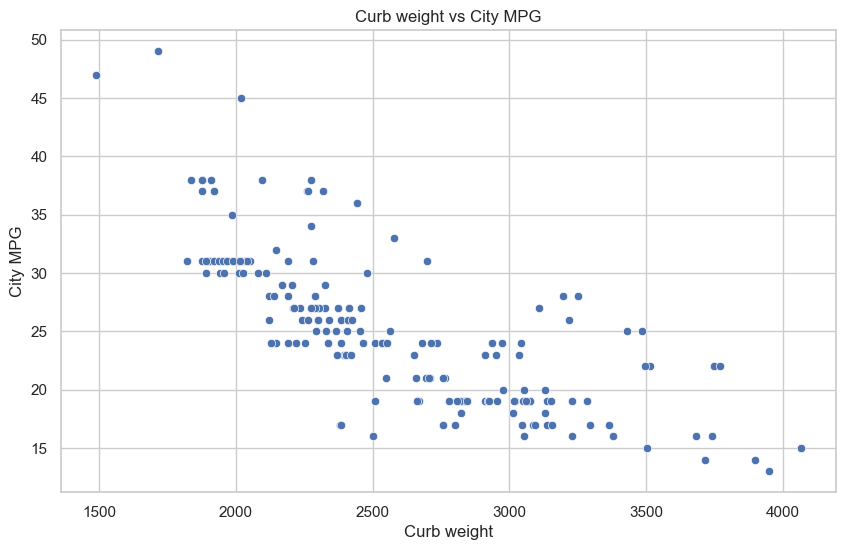

In [32]:
# Setting the graphic style
plt.figure(figsize=(10, 6))
# Creating Scatterplots
sns.scatterplot(data=new_df, x="curb-weight", y="city-mpg")
plt.title("Curb weight vs City MPG")
plt.xlabel("Curb weight")
plt.ylabel("City MPG")
plt.grid(True)
plt.show()

As can be seen from the figure, curb weight ranges from 1500 to 4000 and city MPG ranges from 15 to 50. The data points show some non-linear trends, but there are some outliers, such as the point with a weight of 4000 and the point with a fuel consumption of 50. the data points show a negative correlation between the two variables. The correlation between these two variables is negative, with city MPG tending to decrease when curb weight increases, indicating that heavier vehicles are less fuel efficient in urban driving conditions.

# 3 Regression Model Construction & Evaluation

The process for implementing k-fold cross-validation is as follows:

1. __Dataset Splitting:__ Divide into k subsets or "folds."
2. __Training and Testing:__ Train on k-1 folds, test on the remaining fold and then repeat k times with different validation sets.
3. __Performance Metric:__ Record metric (e.g., R^2) for each iteration.
4. __Average Performance:__ Average metrics for a reliable evaluation.

## 3.1 Explanatory variables selection

For the first model, we will choose the variables that, during the bivariate EDA, showed a clear correlation between them, ensuring the use of relevant features. These include:

- Width
- Length
- Wheel Base
- Engine Size
- Horsepower 
- City MPG

For the second model, we will utilize all the available variables to compare with our previous selection of visually correlated features

## 3.2 Model evaluation

First, we start by importing all the necessary packages to train our linear regression model and to implement k-fold validation

In [33]:
# Import necessary packages
from sklearn.model_selection import cross_val_score  # Import cross-validation function
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
from sklearn.metrics import make_scorer, r2_score  # Import functions for scoring

### 3.2.1 First model

Now, we are starting to build the first model, which includes all the variables where a clear correlation between the variables and the target variable was observed after plotting with a scatter plot.

In [34]:
# Define features for the first model
X = new_df.drop(columns=['curb-weight','height','peak-rpm'])  # Features
y = new_df['curb-weight']  # Target variable

# Linear regression model
model = LinearRegression() # Create an instance of the Linear Regression model

# K-fold cross-validation with K=5
k_fold = 5 # Number of folds for cross-validation
r2_scorer = make_scorer(r2_score) # Create an R^2 scoring function
cv_scores = cross_val_score(model, X, y, cv=k_fold, scoring=r2_scorer) # Perform cross-validation and obtain R^2 scores

# Average R^2 scores
average_r2 = cv_scores.mean()  # Calculate the average R^2 score

print("The R^2 scores for each fold are:", cv_scores)  # Print the R^2 scores for each fold
print(f'Average R^2 score using 5-fold cross-validation: {average_r2}')  # Print the average R^2 score

The R^2 scores for each fold are: [0.9155659  0.92555699 0.90162065 0.67787568 0.85135242]
Average R^2 score using 5-fold cross-validation: 0.8543943271466681


### 3.2.2 Second model

In the second model, we will include variables where a correlation was observed, as well as those where no correlation was observed.

In [35]:
# Define features for the second model
X = new_df.drop(columns=['curb-weight']) # Features
y = new_df['curb-weight'] # Target variable

# Linear regression model
model = LinearRegression() # Create an instance of the Linear Regression model

# K-fold cross-validation with K=5
k_fold = 5 # Number of folds for cross-validation
r2_scorer = make_scorer(r2_score) # Create an R^2 scoring function
cv_scores = cross_val_score(model, X, y, cv=k_fold, scoring=r2_scorer) # Perform cross-validation and obtain R^2 scores

# Average R^2 scores
average_r2 = cv_scores.mean() # Calculate the average R^2 score

print("The R^2 scores for each fold are:", cv_scores) # Print the R^2 scores for each fold
print(f'Average R^2 score using {k_fold}-fold cross-validation: {average_r2}') # Print the average R^2 score

The R^2 scores for each fold are: [0.92269292 0.92820218 0.91345265 0.6897235  0.79031082]
Average R^2 score using 5-fold cross-validation: 0.8488764154316332


# 4 Conclusions

In conclusion, our study utilized UC Irvine machine learning archive data to predict the curb weight of passenger vehicles. The dataset comprised 205 observations with 26 attributes, focusing on key variables such as height, width, length, wheel-base, engine size, horsepower, peak RPM, and city MPG. Curb weight, a crucial metric for understanding a vehicle's weight without occupants or baggage, was examined in relation to diverse physical and performance attributes. Through cross-validated linear regression models, we demonstrated the effectiveness of selected features—such as width, length, wheel base, engine size, horsepower, and city MPG—in accurately estimating curb weight. The models exhibited promising predictive capabilities, with an average R^2 score of 0.85, suggesting their potential utility in real-world applications.

In our analysis, the first model, carefully crafted based on variables showing clear correlations during exploratory data analysis, yielded robust R^2 scores across 5-fold cross-validation. The second model, incorporating all available variables, did not significantly improve performance, maintaining a comparable average R^2 score of 0.85. This indicates that the inclusion of additional variables did not substantially enhance the model's predictive accuracy.

In summary, the first model, based on selected features, outperformed the second, which included all variables. We opted for the first model due to its strong correlations and comparable accuracy.

# 5 References

- Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.